# IBM HR Attrition Prediction:

1.Classification

In [53]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the Dataset:
df = pd.read_csv('C:\\Users\\MI Laptop\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Checking datatypes:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
#Checking for categorical columns:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical Columns:",cat_col)

Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [5]:
#Checking the value count and unique value of each categorical feature:
for col in df.columns:
    if df[col].dtypes == object:
        print(str(col)+':'+str(df[col].unique()))
        print(df[col].value_counts())
        print('********************************************')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
********************************************
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
********************************************
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
********************************************
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
********************************************
Gender:['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
*******************

In [6]:
#Checking the null values in the dataset:
print(df.isnull().values.any())

False


Statistical Analysis:

In [7]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#The average age of employess is around 36 years.
#There is possibility of presence of outliers as mean of some features are greater than median.

Feature Engineering:

In [9]:
#Lets drop the unnecessary columns:
df.drop(columns=['EmployeeCount','Over18','EmployeeNumber','StandardHours'],axis=1,inplace=True)

In [10]:
df.shape

(1470, 31)

Exploratory Data Analysis

1.Univarite Analysis

2.Multivariate Analysis

3.Bivariate Analysis

4.Here we check the relationship between different independant and dependant variable.

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


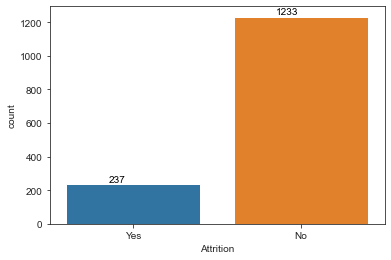

In [12]:
#Univariate Analysis:
#Checking Count of Target Varibale:
sns.set_style('ticks')
ax = sns.countplot(df['Attrition'])
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

**As we can see the no of employees those who are not leaving the company is 1233 but those who are quitting the company is 237 so its an imbalance dataset.

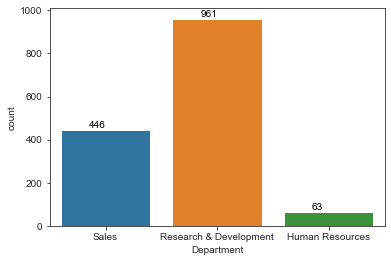

In [13]:
#Univariate Analysis:
#Checking the count of Departments:
sns.set_style('ticks')
ax = sns.countplot(df['Department'])
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

Observations: Employees in Sales Dept:446
,Employees in R & D Dept:961
,Employees in HR Dept:63

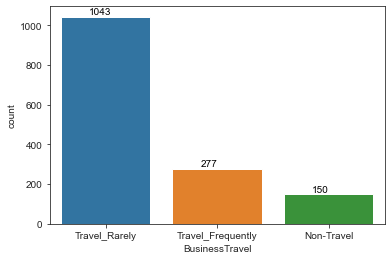

In [14]:
#Univariate Analysis:
#Checking the count of BusinessTravel:
sns.set_style('ticks')
ax = sns.countplot(df['BusinessTravel'])
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

Observations: employees who travel rarely are:1043,travel Frequently are:277,those who dont travel:150

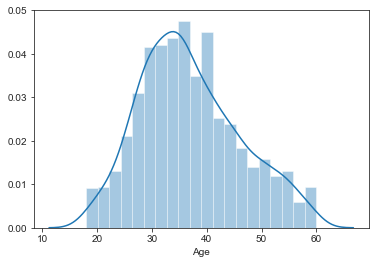

In [15]:
#Univariate Analysis:
#Checking the distribution of age:
sns.distplot(df['Age'],bins=20)

**Observation: Avg age of employees is between 30 to 40

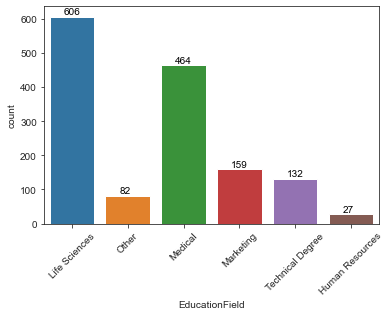

In [16]:
#Univariate Analysis:
#Checking the count of EducationField:
sns.set_style('ticks')
ax = sns.countplot(df['EducationField'])
plt.xticks(rotation=45)
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

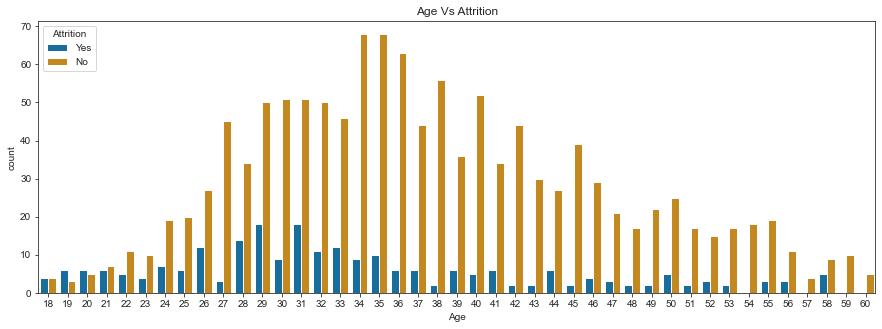

In [17]:
#Bivariate Analysis:
#Checking the realationship between Attrition and Age:
plt.subplots(figsize=(15,5))
plt.title('Age Vs Attrition')
sns.countplot(x='Age',hue='Attrition',data=df,palette='colorblind')

Observation: Employess age between 28 to 32 have maximum chances to leave the company.

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278


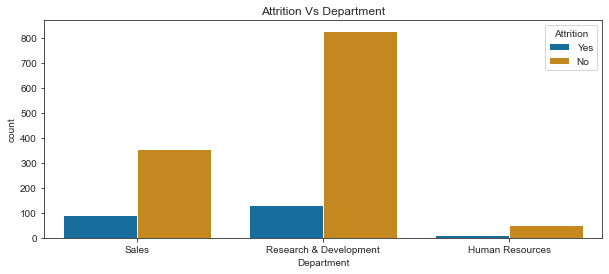

In [18]:
#Bivariate Analysis:
#Checking the realationship between Attrition and Department:
plt.subplots(figsize=(10,4))
plt.title('Attrition Vs Department')
sns.countplot(x='Department',hue='Attrition',data=df,palette='colorblind')
pd.crosstab(index=df['Department'],columns=df['Attrition'],normalize='index')

Observation: Maximum possibility employees from Research and Development department can leave the company:

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068


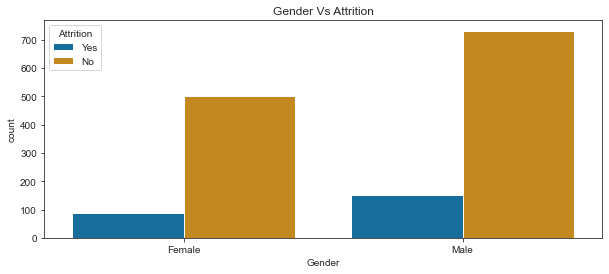

In [19]:
#Bivariate Analysis:
#Checking the realationship between Attrition and gender:
plt.subplots(figsize=(10,4))
plt.title('Gender Vs Attrition')
sns.countplot(x='Gender',hue='Attrition',data=df,palette='colorblind')
pd.crosstab(index=df['Gender'],columns=df['Attrition'],normalize='index')

Observation: Maximum males are set to leave the company:

Attrition,No,Yes
JobRole,,
Healthcare Representative,0.931298,0.068702
Human Resources,0.769231,0.230769
Laboratory Technician,0.760618,0.239382
Manager,0.950980,0.049020
Manufacturing Director,0.931034,0.068966
Research Director,0.975000,0.025000
Research Scientist,0.839041,0.160959
Sales Executive,0.825153,0.174847
Sales Representative,0.602410,0.397590


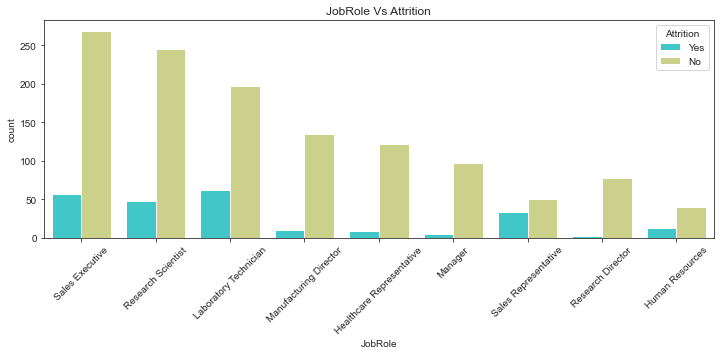

In [20]:
#Bivariate Analysis:
#Checking the realationship between Attrition and jobrole:
plt.subplots(figsize=(12,4))
plt.title('JobRole Vs Attrition')
plt.xticks(rotation=45)
sns.countplot(x='JobRole',hue='Attrition',data=df,palette='rainbow')
pd.crosstab(index=df['JobRole'],columns=df['Attrition'],normalize='index')

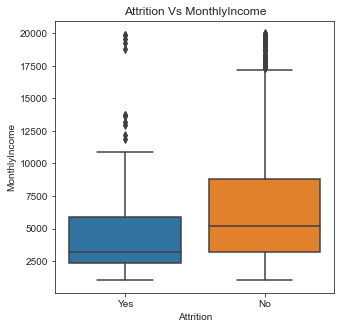

In [21]:
#Bivariate Analysis:
#Checking the realationship between Attrition and MonthlyIncome:
plt.figure(figsize=(5,5))
plt.title('Attrition Vs MonthlyIncome')
sns.boxplot(x='Attrition',y='MonthlyIncome',data=df)

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529


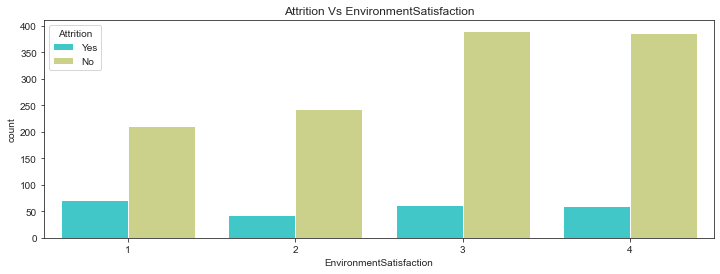

In [22]:
#Bivariate Analysis:
#Checking the realationship between Attrition and EnvironmentSatisfaction:
plt.subplots(figsize=(12,4))
plt.title('Attrition Vs EnvironmentSatisfaction')
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df,palette='rainbow')
pd.crosstab(index=df['EnvironmentSatisfaction'],columns=df['Attrition'],normalize='index')

In [23]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.

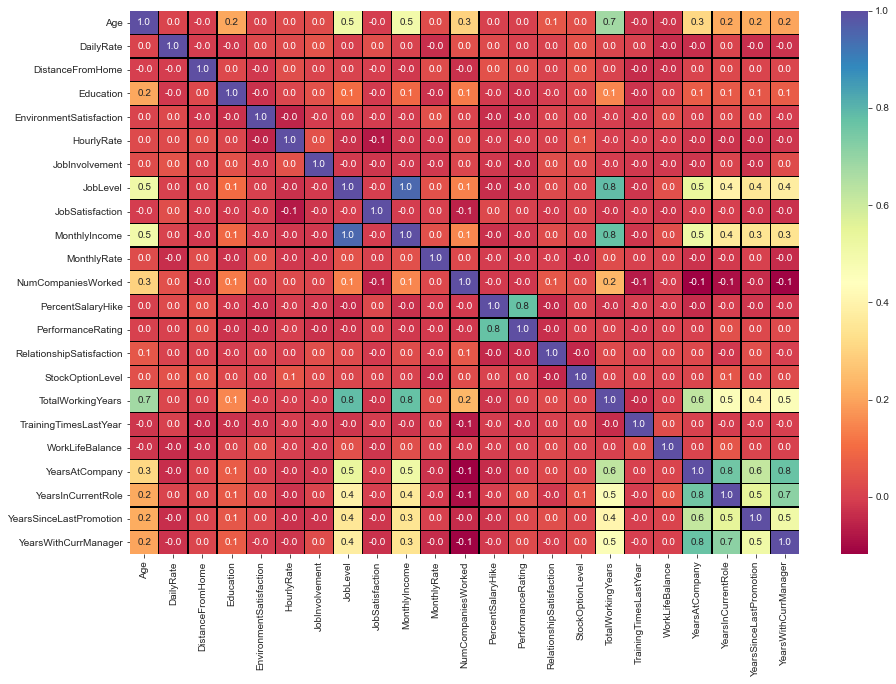

In [24]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

**Observations:Area under ligther region are highly corelated and area under darker region are highly negatively corelated.

In [25]:
#using Label Encoder to convert Categorical data into neumeric:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for col in columns:
    df[col] = le.fit_transform(df[col])

In [26]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [27]:
df.shape

(1470, 31)

In [28]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.

In [29]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [30]:
import scipy.stats as stat
import pylab

In [31]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

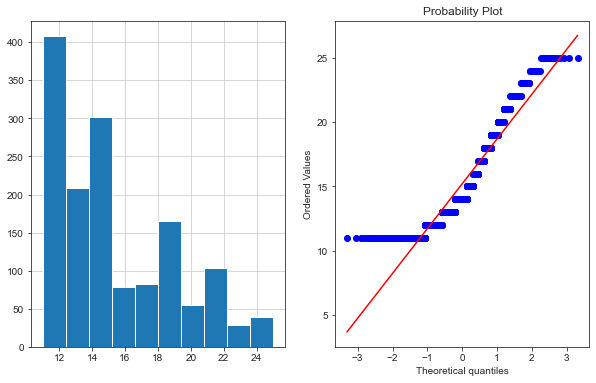

In [32]:
plot_data(df,'PercentSalaryHike')

In [33]:
# We can clearly see data points are not been normally distributed.

In [34]:
for col in df.columns:
    if col!= 'Attrition':
        if df.skew().loc[col]>0.55:
            df[col] = np.log1p(df[col])

In [35]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.

In [36]:
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (1470, 31)
After removal of outliers: (1406, 31)


In [37]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop('Attrition',axis=1)
y = df_final['Attrition']
print('shape of X is {}'.format(X.shape))
print('shape of y is {}'.format(y.shape))

shape of X is (1406, 30)
shape of y is (1406,)


In [38]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [41]:
model = [LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(X_train,y_train)
    print("Score of",m, "is:",m.score(X_train,y_train))
    y_predict= m.predict(X_test)
    print("accuracy_score:",accuracy_score(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    print('******************************************************************')
    print('\n')

Score of LogisticRegression() is: 0.8896797153024911
accuracy_score: 0.875886524822695
[[235   6]
 [ 29  12]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       241
           1       0.67      0.29      0.41        41

    accuracy                           0.88       282
   macro avg       0.78      0.63      0.67       282
weighted avg       0.86      0.88      0.85       282

[[235   6]
 [ 29  12]]
******************************************************************


Score of SVC() is: 0.9288256227758007
accuracy_score: 0.8652482269503546
[[238   3]
 [ 35   6]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       241
           1       0.67      0.15      0.24        41

    accuracy                           0.87       282
   macro avg       0.77      0.57      0.58       282
weighted avg       0.84      0.87      0.83       282

[[238   3]
 [ 35   6]]
*************************

In [42]:
#We are getting Maximum accuracy Score with Logistic Regression Lets Implement it with Cross Validation:

In [43]:
#Implementing Algorithim
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [44]:
#Performing Hyperparametre Tuning
param_grid = {'C': np.logspace(-3, 3, 10),'penalty':['l2','l1']}  

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=5,verbose=0,n_jobs=-1)

In [45]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'C': 0.1, 'penalty': 'l2'}

accuracy_score: 0.8723404255319149
[[237   4]
 [ 32   9]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       241
           1       0.69      0.22      0.33        41

    accuracy                           0.87       282
   macro avg       0.79      0.60      0.63       282
weighted avg       0.85      0.87      0.84       282



Text(0.5, 16.0, 'Predicted label')

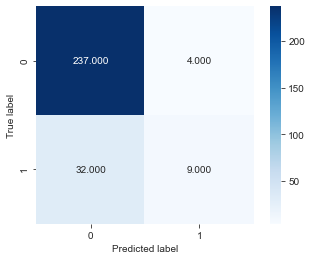

In [52]:
model = LogisticRegression(C=0.1,penalty='l2')
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

AUC and ROC Curv

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [48]:
y_pred_prob = model.predict_proba(X_test)[:,1]

In [49]:
tpr,fpr,thresholds = roc_curve(y_test,y_pred_prob)

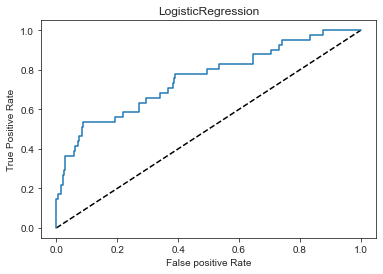

In [50]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label ='LogisticRegression')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression')
plt.show()

# Saving the Best Model:

In [51]:
import joblib
joblib.dump(model,'model.obj')
model_from_joblib = joblib.load('model.obj')
model_from_joblib.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])